In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Dataset is from the  National Health and Nutrition Examination Survey (NHANES) conducted by the CDC

# This file contains the collected body measurements of the participants
with open("../data/BMX_L.XPT", "rb") as f:
    df_body = pd.read_sas(f, format="xport")

# This file contains the demographic information of the participants (including age)
with open("../data/DEMO_L.XPT", "rb") as f:
    df_demo = pd.read_sas(f, format="xport")

# Merge the two dataframes by the unique identifier SEQN
df = pd.merge(df_body, df_demo, on="SEQN")

df

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,1.0,86.9,NaN,NaN,NaN,NaN,NaN,179.5,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,1.0,101.8,NaN,NaN,NaN,NaN,NaN,174.2,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,1.0,69.4,NaN,NaN,NaN,NaN,NaN,152.9,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,1.0,34.3,NaN,NaN,NaN,NaN,NaN,120.1,NaN,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,3.0,13.6,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,142306.0,1.0,25.3,NaN,NaN,NaN,NaN,NaN,128.0,NaN,...,1.0,3.0,3.0,3.0,NaN,11147.192563,13459.129019,176.0,1.0,2.01
8856,142307.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,143.8,NaN,...,NaN,NaN,NaN,NaN,NaN,69419.620456,64962.328962,181.0,1.0,NaN
8857,142308.0,1.0,79.3,NaN,NaN,NaN,NaN,NaN,173.3,NaN,...,NaN,NaN,NaN,NaN,NaN,32696.313477,44367.534132,183.0,2.0,1.95
8858,142309.0,1.0,81.9,NaN,NaN,NaN,NaN,NaN,179.1,NaN,...,NaN,NaN,NaN,NaN,NaN,30547.974564,46249.361849,176.0,1.0,3.11


In [3]:
age = df["RIDAGEYR"].to_numpy() # age in years (capped at 80)
weight = df["BMXWT"].to_numpy() # weight in kg
height = df["BMXHT"].to_numpy() # height in cm
gender = df["RIAGENDR"].to_numpy() # gender

stacked = np.stack((age, weight, height, gender), axis=1)
print(stacked.shape)
stacked = stacked[~np.isnan(stacked).any(axis=1)]
print(stacked.shape)

(8860, 4)
(8471, 4)


In [4]:
# Some plotting parameters
height = 3  # for the jointplot
joint_marginal_ratio = 4
kde_linewidth = 1.1
cond_line_width = 1.5
num_hist_bins = 25

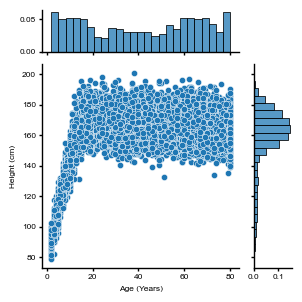

In [5]:
# First plot: Age vs. Weight with marginal KDEs
with plt.rc_context(fname=".matplotlibrc"):
    g = sns.jointplot(
        x=stacked[:, 0],
        y=stacked[:, 2],
        kind="scatter",
        marginal_kws=dict(bins=num_hist_bins, stat="probability"),
        height=height,
        ratio=joint_marginal_ratio,
        marginal_ticks=True,
    )
    g.set_axis_labels("Age (Years)", "Height (cm)")

    plt.tight_layout()
    plt.show()

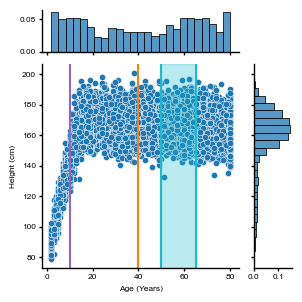

In [6]:
# conditional
cond_age_one = 40
cond_age_two = 10
cond_age_three_low = 50
cond_age_three_high = 65


# First plot: Age vs. Weight with marginal KDEs
with plt.rc_context(fname=".matplotlibrc"):
    g = sns.jointplot(
        x=stacked[:, 0],
        y=stacked[:, 2],
        kind="scatter",
        marginal_kws=dict(bins=num_hist_bins, stat="probability"),
        height=height,
        ratio=joint_marginal_ratio,
        marginal_ticks=True,
    )
    g.set_axis_labels("Age (Years)", "Height (cm)")

    g.ax_joint.axvline(x=cond_age_one, color="C1", linewidth=cond_line_width)
    g.ax_joint.axvline(x=cond_age_two, color="C4", linewidth=cond_line_width)
    g.ax_joint.axvline(x=cond_age_three_low, color="C9", linewidth=cond_line_width)
    g.ax_joint.axvline(x=cond_age_three_high, color="C9", linewidth=cond_line_width)
    g.ax_joint.set_ylim(auto=False)
    g.ax_joint.fill_between(
        x=[cond_age_three_low, cond_age_three_high],
        y1=g.ax_joint.get_ylim()[0],
        y2=g.ax_joint.get_ylim()[1],
        color="C9",
        alpha=0.3,
    )
    
    plt.tight_layout()
    plt.show()

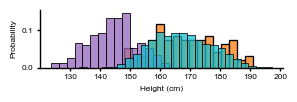

In [7]:
cond_years_one = stacked[stacked[:, 0] == cond_age_one]
cond_years_two = stacked[stacked[:, 0] == cond_age_two]
cond_years_three = stacked[
    (stacked[:, 0] >= cond_age_three_low) & (stacked[:, 0] <= cond_age_three_high)
]

with plt.rc_context(fname=".matplotlibrc"):
    fig, ax = plt.subplots(figsize=(3, 1))
    g = sns.histplot(
        cond_years_one[:, 2],
        binwidth=65 / num_hist_bins,
        ax=ax,
        stat="probability",
        color="C1",
    )
    sns.histplot(
        cond_years_two[:, 2],
        binwidth=65 / num_hist_bins,
        ax=ax,
        stat="probability",
        color="C4",
    )
    sns.histplot(
        cond_years_three[:, 2],
        binwidth=65 / num_hist_bins,
        ax=ax,
        stat="probability",
        color="C9",
    )

    g.axes.set_xlabel("Height (cm)")
    plt.tight_layout()
    plt.show()

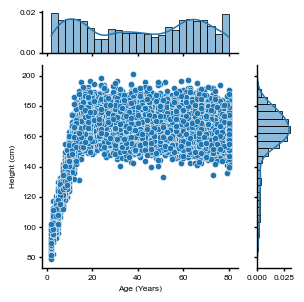

In [8]:
# First plot: Age vs. Weight with marginal KDEs
with plt.rc_context(fname=".matplotlibrc"):
    g = sns.jointplot(
        x=stacked[:, 0],
        y=stacked[:, 2],
        kind="scatter",
        marginal_kws=dict(kde=True, bins=num_hist_bins, stat="density"),
        height=height,
        ratio=joint_marginal_ratio,
        marginal_ticks=True,
    )
    g.set_axis_labels("Age (Years)", "Height (cm)")
    g.ax_marg_x.lines[0].set_linewidth(kde_linewidth)
    g.ax_marg_x.lines[0].set_c("C0")
    g.ax_marg_y.lines[0].set_linewidth(kde_linewidth)
    g.ax_marg_y.lines[0].set_c("C0")
    plt.tight_layout()
    plt.show()

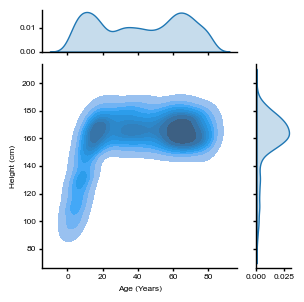

In [9]:
with plt.rc_context(fname=".matplotlibrc"):
    g = sns.jointplot(
        x=stacked[:, 0],
        y=stacked[:, 2],
        kind="kde",
        height=height,
        ratio=joint_marginal_ratio,
        marginal_ticks=True,
        joint_kws=dict(fill=True, color="C0"),
    )
    g.set_axis_labels("Age (Years)", "Height (cm)")
    plt.tight_layout()
    plt.show()

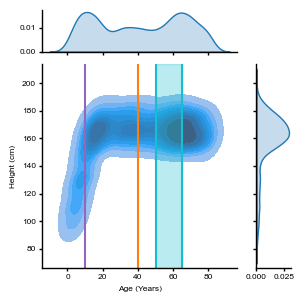

In [10]:
with plt.rc_context(fname=".matplotlibrc"):
    g = sns.jointplot(
        x=stacked[:, 0],
        y=stacked[:, 2],
        kind="kde",
        height=height,
        ratio=joint_marginal_ratio,
        marginal_ticks=True,
        joint_kws=dict(fill=True, color="C0"),
    )
    g.set_axis_labels("Age (Years)", "Height (cm)")
    g.ax_joint.axvline(x=cond_age_one, color="C1", linewidth=cond_line_width)
    g.ax_joint.axvline(x=cond_age_two, color="C4", linewidth=cond_line_width)

    g.ax_joint.axvline(x=cond_age_three_low, color="C9", linewidth=cond_line_width)
    g.ax_joint.axvline(x=cond_age_three_high, color="C9", linewidth=cond_line_width)
    g.ax_joint.set_ylim(auto=False)
    g.ax_joint.fill_between(
        x=[cond_age_three_low, cond_age_three_high],
        y1=g.ax_joint.get_ylim()[0],
        y2=g.ax_joint.get_ylim()[1],
        color="C9",
        alpha=0.3,
    )

    plt.tight_layout()
    plt.show()

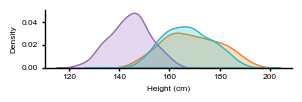

In [11]:
with plt.rc_context(fname=".matplotlibrc"):
    fig, ax = plt.subplots(figsize=(3, 1))
    g = sns.kdeplot(
        cond_years_one[:, 2],
        ax=ax,
        color="C1",
        fill=True,
    )
    sns.kdeplot(
        cond_years_two[:, 2],
        ax=ax,
        color="C4",
        fill=True,
    )
    sns.kdeplot(
        cond_years_three[:, 2],
        ax=ax,
        color="C9",
        fill=True,
    )
    g.axes.set_xlabel("Height (cm)")
    plt.tight_layout()
    plt.show()

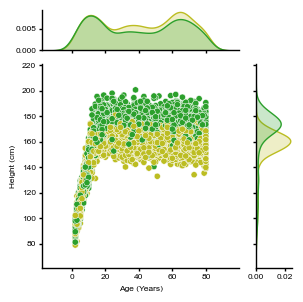

In [12]:
with plt.rc_context(fname=".matplotlibrc"):
    g = sns.jointplot(
        x=stacked[:, 0],
        y=stacked[:, 2],
        hue=stacked[:, 3],
        kind="scatter",
        height=height,
        ratio=joint_marginal_ratio,
        marginal_ticks=True,
        palette={1: "C2", 2: "C8"},
    )
    g.set_axis_labels("Age (Years)", "Height (cm)")
    g.ax_joint.legend_.remove()
    plt.tight_layout()
    plt.show()

In [13]:
# Get mean and std of height
mean_height = np.mean(stacked[:, 2])
# Get cumulative distribution function of height below 179
cdf_height = np.sum(stacked[:, 2] < 179) / stacked.shape[0]
print("Num people: ", stacked.shape[0])
print(f"Mean height: {mean_height}")
print(f"CDF of height below 179: {cdf_height}")

# Do the same for all the conditional height distributions
mean_height_cond_one = np.mean(cond_years_one[:, 2])
cdf_height_cond_one = np.sum(cond_years_one[:, 2] < 179) / cond_years_one.shape[0]

print("Num people with age 40: ", cond_years_one.shape[0])
print(f"Mean height conditional 40: {mean_height_cond_one}")
print(f"CDF of height below 179 conditional 40: {cdf_height_cond_one}")

cdf_height_cond_one_aa = (
    np.sum(cond_years_one[cond_years_one[:, 3] == 1, 2] < 179)
    / cond_years_one[cond_years_one[:, 3] == 1, 2].shape[0]
)
print(f"CDF of height below 179 conditional 40, male: {cdf_height_cond_one_aa}")
cdf_height_cond_one_bb = (
    np.sum(cond_years_one[cond_years_one[:, 3] == 2, 2] < 179)
    / cond_years_one[cond_years_one[:, 3] == 2, 2].shape[0]
)
print(f"CDF of height below 179 conditional 40, female: {cdf_height_cond_one_bb}")

Num people:  8471
Mean height: 159.652260653996
CDF of height below 179: 0.8975327588242238
Num people with age 40:  94
Mean height conditional 40: 168.72127659574468
CDF of height below 179 conditional 40: 0.7872340425531915
CDF of height below 179 conditional 40, male: 0.5454545454545454
CDF of height below 179 conditional 40, female: 1.0
